In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
df=pd.read_excel('Superstore.xls')

In [2]:
df.drop(labels=['Row ID','Order ID','Order Date','Ship Date','Country','Customer Name'],inplace=True,axis=1)

In [3]:
df

,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.isnull().sum()

Ship Mode       0
Customer ID     0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.nunique()

Ship Mode          4
Customer ID      793
Segment            3
City             531
State             49
Postal Code      631
Region             4
Product ID      1862
Category           3
Sub-Category      17
Product Name    1850
Sales           6144
Quantity          14
Discount          12
Profit          7545
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

We have 10 categorical features : ['Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [10]:
x= df.drop(columns=['Profit'],axis=1)

In [11]:
y=df['Profit'].copy()

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in x.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in x.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Postal Code', 'Sales', 'Quantity', 'Discount']

We have 10 categorical features : ['Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scale=StandardScaler()
for fea in numeric_features:
    x[fea]=scale.fit_transform(x[[fea]])
x.describe()

,Postal Code,Sales,Quantity,Discount
count,9.993000e+03,9.993000e+03,9.993000e+03,9.993000e+03
mean,-3.768514e-17,-6.186052e-17,-8.603590e-17,9.385734e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.688887e+00,-3.680878e-01,-1.253800e+00,-7.565543e-01
25%,-9.970404e-01,-3.410744e-01,-8.043697e-01,-7.565543e-01
50%,4.267859e-02,-2.813867e-01,-3.549391e-01,2.122176e-01
75%,1.085860e+00,-3.195028e-02,5.439221e-01,2.122176e-01
max,1.375691e+00,3.595477e+01,4.588797e+00,3.118533e+00


In [14]:
x['Segment'].nunique()

3

In [15]:
x['Profit']=y

In [16]:
huge_cat = [fea for fea in categorical_features if x[fea].nunique()>10]
huge_cat

['Customer ID', 'City', 'State', 'Product ID', 'Sub-Category', 'Product Name']

In [17]:
for fea in huge_cat:
    x[fea] = x[fea].map(x.groupby(fea)['Profit'].mean())

In [18]:
x

,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,33.986880,Consumer,96.310998,80.573357,-0.398322,South,-14.080350,Furniture,-15.230509,-14.080350,0.051516,-0.804370,-0.756554,41.9136
1,Second Class,33.986880,Consumer,96.310998,80.573357,-0.398322,South,160.620167,Furniture,43.185430,160.620167,0.805602,-0.354939,-0.756554,219.5820
2,Second Class,-47.464889,Corporate,40.750680,38.171608,1.086733,West,9.200157,Office Supplies,15.236962,9.200157,-0.345342,-0.804370,-0.756554,6.8714
3,Standard Class,-5.405720,Consumer,-10.757007,-8.875461,-0.682414,South,-66.595162,Furniture,-55.565771,-66.595162,1.167638,0.543922,1.423182,-383.0310
4,Standard Class,-5.405720,Consumer,-10.757007,-8.875461,-0.682414,South,12.749760,Office Supplies,25.152277,12.749760,-0.332911,-0.804370,0.212218,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,164.609935,Consumer,-20.181937,-8.875461,-0.686500,South,12.466200,Furniture,13.645918,12.466200,-0.328290,-0.354939,0.212218,4.1028
9990,Standard Class,36.386708,Consumer,27.018991,38.171608,1.167541,West,17.800829,Furniture,13.645918,17.800829,-0.221250,-0.804370,-0.756554,15.6332
9991,Standard Class,36.386708,Consumer,27.018991,38.171608,1.167541,West,82.190229,Technology,50.073938,82.190229,0.046086,-0.804370,0.212218,19.3932
9992,Standard Class,36.386708,Consumer,27.018991,38.171608,1.167541,West,9.928333,Office Supplies,24.856620,9.928333,-0.321307,0.094492,-0.756554,13.3200


In [19]:
cat=[fea for fea in categorical_features if fea not in huge_cat ]
cat

['Ship Mode', 'Segment', 'Region', 'Category']

In [20]:
x=pd.get_dummies(x,columns=cat,drop_first=True)
x.columns

Index(['Customer ID', 'City', 'State', 'Postal Code', 'Product ID',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
       'Region_East', 'Region_South', 'Region_West',
       'Category_Office Supplies', 'Category_Technology'],
      dtype='object')

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [22]:
def remove_outliers_3sd(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [23]:
'''for fea in x.columns:
    if fea!='Profit':
        x = remove_outliers_3sd(x,fea)'''

"for fea in x.columns:\n    if fea!='Profit':\n        x = remove_outliers_3sd(x,fea)"

In [24]:
x.columns

Index(['Customer ID', 'City', 'State', 'Postal Code', 'Product ID',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
       'Region_East', 'Region_South', 'Region_West',
       'Category_Office Supplies', 'Category_Technology'],
      dtype='object')

In [25]:
y=x['Profit'].copy()

In [26]:
x.drop(labels=['Profit'],inplace=True,axis=1)
x

,Customer ID,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,33.986880,96.310998,80.573357,-0.398322,-14.080350,-15.230509,-14.080350,0.051516,-0.804370,-0.756554,0,1,0,0,0,0,1,0,0,0
1,33.986880,96.310998,80.573357,-0.398322,160.620167,43.185430,160.620167,0.805602,-0.354939,-0.756554,0,1,0,0,0,0,1,0,0,0
2,-47.464889,40.750680,38.171608,1.086733,9.200157,15.236962,9.200157,-0.345342,-0.804370,-0.756554,0,1,0,1,0,0,0,1,1,0
3,-5.405720,-10.757007,-8.875461,-0.682414,-66.595162,-55.565771,-66.595162,1.167638,0.543922,1.423182,0,0,1,0,0,0,1,0,0,0
4,-5.405720,-10.757007,-8.875461,-0.682414,12.749760,25.152277,12.749760,-0.332911,-0.804370,0.212218,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,164.609935,-20.181937,-8.875461,-0.686500,12.466200,13.645918,12.466200,-0.328290,-0.354939,0.212218,0,1,0,0,0,0,1,0,0,0
9990,36.386708,27.018991,38.171608,1.167541,17.800829,13.645918,17.800829,-0.221250,-0.804370,-0.756554,0,0,1,0,0,0,0,1,0,0
9991,36.386708,27.018991,38.171608,1.167541,82.190229,50.073938,82.190229,0.046086,-0.804370,0.212218,0,0,1,0,0,0,0,1,0,1
9992,36.386708,27.018991,38.171608,1.167541,9.928333,24.856620,9.928333,-0.321307,0.094492,-0.756554,0,0,1,0,0,0,0,1,1,0


In [27]:
x.describe()

,Customer ID,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
count,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9993.000000,9.993000e+03,9.993000e+03,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,28.660971,28.660971,28.660971,-3.768514e-17,28.660971,28.660971,28.660971,-6.186052e-17,-8.603590e-17,9.385734e-17,0.054338,0.194636,0.597118,0.302212,0.178325,0.284899,0.162113,0.320524,0.603022,0.184829
std,70.088499,54.969555,47.395963,1.000050e+00,166.760109,68.782390,167.044798,1.000050e+00,1.000050e+00,1.000050e+00,0.226695,0.395940,0.490502,0.459239,0.382805,0.451389,0.368573,0.466702,0.489296,0.388179
min,-736.265500,-200.619160,-36.237859,-1.688887e+00,-3839.990400,-55.565771,-3839.990400,-3.680878e-01,-1.253800e+00,-7.565543e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367520,-10.624900,-26.121174,-9.970404e-01,2.513867,13.645918,2.552080,-3.410744e-01,-8.043697e-01,-7.565543e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.356309,34.328207,38.171608,4.267859e-02,9.012133,24.856620,9.072350,-2.813867e-01,-3.549391e-01,2.122176e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,44.723423,62.068558,65.637011,1.085860e+00,29.692000,38.922758,28.406920,-3.195028e-02,5.439221e-01,2.122176e-01,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,748.443658,642.885750,204.088936,1.375691e+00,5039.985600,817.909190,5039.985600,3.595477e+01,4.588797e+00,3.118533e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
x.describe()

,Customer ID,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
count,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9993.000000,9.993000e+03,9.993000e+03,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,28.660971,28.660971,28.660971,-3.768514e-17,28.660971,28.660971,28.660971,-6.186052e-17,-8.603590e-17,9.385734e-17,0.054338,0.194636,0.597118,0.302212,0.178325,0.284899,0.162113,0.320524,0.603022,0.184829
std,70.088499,54.969555,47.395963,1.000050e+00,166.760109,68.782390,167.044798,1.000050e+00,1.000050e+00,1.000050e+00,0.226695,0.395940,0.490502,0.459239,0.382805,0.451389,0.368573,0.466702,0.489296,0.388179
min,-736.265500,-200.619160,-36.237859,-1.688887e+00,-3839.990400,-55.565771,-3839.990400,-3.680878e-01,-1.253800e+00,-7.565543e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367520,-10.624900,-26.121174,-9.970404e-01,2.513867,13.645918,2.552080,-3.410744e-01,-8.043697e-01,-7.565543e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.356309,34.328207,38.171608,4.267859e-02,9.012133,24.856620,9.072350,-2.813867e-01,-3.549391e-01,2.122176e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,44.723423,62.068558,65.637011,1.085860e+00,29.692000,38.922758,28.406920,-3.195028e-02,5.439221e-01,2.122176e-01,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,748.443658,642.885750,204.088936,1.375691e+00,5039.985600,817.909190,5039.985600,3.595477e+01,4.588797e+00,3.118533e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7994, 20), (1999, 20))

In [30]:
y_train

4099     6.4700
3536     0.4074
3498     5.3340
5853     4.7236
168      6.8136
         ...   
5735     4.8720
5192    43.7360
5391    10.8000
860      0.1472
7271     4.5448
Name: Profit, Length: 7994, dtype: float64

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVR":SVR(kernel='rbf'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 136.4482
- Mean Absolute Error: 49.7051
- R2 Score: 0.6142
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 223.2048
- Mean Absolute Error: 60.2844
- R2 Score: 0.3873




C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+07, tolerance: 3.857e+04
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 136.6045
- Mean Absolute Error: 48.9091
- R2 Score: 0.6133
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 220.3453
- Mean Absolute Error: 59.2193
- R2 Score: 0.4029


Ridge
Model performance for Training set
- Root Mean Squared Error: 136.4482
- Mean Absolute Error: 49.6997
- R2 Score: 0.6142
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 223.1772
- Mean Absolute Error: 60.2772
- R2 Score: 0.3875


SVR
Model performance for Training set
- Root Mean Squared Error: 213.2066
- Mean Absolute Error: 44.5470
- R2 Score: 0.0580
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 279.7717
- Mean Absolute Error: 56.7538
- R2 Score: 0.0375


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 126.3005
- Mean Absolute Error: 32.0982
- R2 Score: 0.6694
----------------

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_iter=5, Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True}
n_iter=5, Mean Squared Error: 0.6141673815936144


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_iter=10, Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True}
n_iter=10, Mean Squared Error: 0.6141673815936144


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_iter=20, Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True}
n_iter=20, Mean Squared Error: 0.6141673815936144


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_iter=50, Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True}
n_iter=50, Mean Squared Error: 0.6141673815936144


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


n_iter=100, Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True}
n_iter=100, Mean Squared Error: 0.6141673815936144


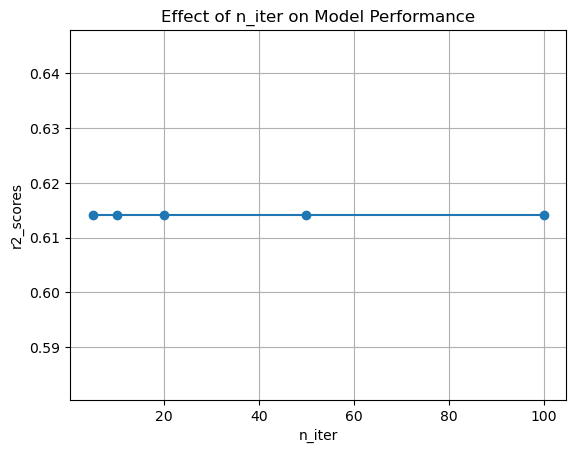

In [32]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'fit_intercept': [True, False],
}
lr_model = LinearRegression()

# Try different values of n_iter for RandomizedSearchCV
n_iter_values = [5, 10, 20, 50, 100]

r2_scores = []

for n_iter_val in n_iter_values:
    # Create the RandomizedSearchCV object with the current n_iter value
    random_search = RandomizedSearchCV(lr_model, param_distributions, n_iter=n_iter_val, scoring='r2', cv=5, random_state=42)
    
    # Perform the hyperparameter search on the data
    random_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and the corresponding model
    best_params_random = random_search.best_params_
    
    # Evaluate the best model on the data
    y_pred = random_search.predict(X_train)
    r2 = r2_score(y_train, y_pred)
    r2_scores.append(r2)
    
    print(f"n_iter={n_iter_val}, Best Hyperparameters from RandomizedSearchCV:", best_params_random)
    print(f"n_iter={n_iter_val}, Mean Squared Error:", r2)

# Plot the results
plt.plot(n_iter_values, r2_scores, marker='o')
plt.xlabel('n_iter')
plt.ylabel('r2_scores')
plt.title('Effect of n_iter on Model Performance')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score

# Create the Lasso Regression model
lasso_model = Lasso()

# Define the hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'alpha': np.logspace(-4, 2, 100),  # Range of alpha values for regularization strength
    'fit_intercept': [True, False]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(lasso_model, param_distributions, n_iter=10, scoring='r2', cv=5, random_state=42)

# Perform the hyperparameter search on the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params_random = random_search.best_params_

print("Best Hyperparameters from RandomizedSearchCV:", best_params_random)

# Use the best alpha value obtained from RandomizedSearchCV to create a small range of values for alpha in GridSearchCV
best_alpha = best_params_random['alpha']
alpha_range = np.linspace(best_alpha * 0.8, best_alpha * 1.2, 10)  # Create a small range around the best alpha value
param_grid = {
    'alpha': alpha_range,
    'fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(lasso_model, param_grid, scoring='r2', cv=5)

# Perform the hyperparameter search on the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model from GridSearchCV
best_params_grid = grid_search.best_params_

print("Best Hyperparameters from GridSearchCV:", best_params_grid)

# Evaluate the best model on the data
y_pred = grid_search.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R-squared Score:", r2)


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.355e+07, tolerance: 3.022e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.306e+07, tolerance: 3.598e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.667e+07, toleranc

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.385e+07, tolerance: 3.598e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.033e+07, tolerance: 2.707e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+07, toleranc

Best Hyperparameters from RandomizedSearchCV: {'fit_intercept': True, 'alpha': 0.0008111308307896872}


C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e+07, tolerance: 2.964e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.871e+07, tolerance: 3.537e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+07, toleranc

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.039e+07, tolerance: 2.887e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.324e+07, tolerance: 3.022e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.875e+07, toleranc